In [2]:
import tensorflow as tf
import pandas as pd
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

In [3]:

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

In [4]:
import os
import sys
sys.path.append(os.path.join(os.environ['USERPROFILE'], '.local', 'lib', 'python3.7', 'site-packages'))


In [5]:
data = pd.read_csv("../../Desktop/notebooks/mult_ds_preprocessed.csv")

In [6]:
data_cleaned = data.dropna()

In [24]:
data_cleaned["identity_hate"] = data_cleaned["identity_hate"].astype(int)

C:\Users\DVdovenko\AppData\Local\Temp\ipykernel_4004\3181892689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["identity_hate"] = data_cleaned["identity_hate"].astype(int)


In [25]:
data_cleaned.shape

(42881, 9)

In [26]:
data_cleaned.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,426417035bd5b20c,пропонований злиття неформалізм стаття існуват...,0,0,0,0,0,0
1,1,4264fd1c363935d3,колір фон заповнення колір фон світлосірий вер...,0,0,0,0,0,0
2,2,4265fd7c2447bc08,жила скеля половина австралійський англійський...,0,0,0,0,0,0
3,3,4266b67c57e3cfbb,японський назва місто переглянути пост вікіпед...,0,0,0,0,0,0
4,4,426a0fd1b3460373,небажання обговорювати будьякий змінити свідчи...,1,0,0,0,0,0


In [143]:
# Select only the "comment_text" and "toxic" columns
selected_columns = ['comment_text', 'toxic']
data = data_cleaned[selected_columns]


In [145]:
data["toxic"] = data["toxic"].astype(int)

C:\Users\DVdovenko\AppData\Local\Temp\ipykernel_5728\4071066043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["toxic"] = data["toxic"].astype(int)


In [239]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data['comment_text'], data['toxic'], test_size=0.2, random_state=42)

# Split the training data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [240]:
train_data = [' '.join(map(str, example)) for example in train_data.tolist()]
val_data = [' '.join(map(str, example)) for example in val_data.tolist()]
test_data = [' '.join(map(str, example)) for example in test_data.tolist()]


## Utilization of rubert-tiny-toxicity model for transfer-learning in order to label the dataset with multiple classes

In [64]:
from transformers import TFAutoModel, BertTokenizerFast
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('cointegrated/rubert-tiny-toxicity')

model = AutoModelForSequenceClassification.from_pretrained('cointegrated/rubert-tiny-toxicity')


In [65]:
#Splitting the dataset into comments and features

X = data['comment_text']
y = data[data.columns[3:]].values
X = X.astype('str')

In [66]:
df = pd.DataFrame(np.array(data['comment_text']), columns=['comment_text'])

In [68]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [58]:
X = [str(x) for x in X]


In [73]:
df['comment_text'] = df['comment_text'].astype('str')

In [74]:
df['sentiment'] = df['comment_text'].apply(lambda x: sentiment_score(x[:512]))

In [77]:
df

,comment_text,sentiment
0,пропонований злиття неформалізм стаття існуват...,1
1,колір фон заповнення колір фон світлосірий вер...,1
2,жила скеля половина австралійський англійський...,1
3,японський назва місто переглянути пост вікіпед...,1
4,небажання обговорювати будьякий змінити свідчи...,5
...,...,...
43087,это объясняться страница обсуждение нервный ан...,1
43088,предложение совместный работа статья привет со...,5
43089,это уля глостершир хотя одноимённый гастропаб ...,5
43090,спасибо тёплый приём гомосексуальный гей фрукт...,2


In [78]:
non_toxic = df[df["sentiment"] == 1]
insult = df[df["sentiment"] == 2]
obscenity = df[df["sentiment"]==3]
threat = df[df["sentiment"]==4]
dangerous = df[df["sentiment"]==5]


n_non_toxic = len(non_toxic)
n_insult = len(insult)
n_obscenity = len(obscenity)
n_threat = len(threat)
n_dangerous = len(dangerous)


In [79]:
n_non_toxic

35755

In [80]:
n_insult

1216

In [81]:
n_obscenity

412

In [82]:
n_threat

449

In [83]:
n_dangerous

5260

In [84]:
df.to_csv("multiclass_mult.csv")

In [85]:
import pandas as pd
import numpy as np

# Define the class labels and dataframes
labels = [1, 2, 3, 4, 5]
dfs = [df[df["sentiment"] == label] for label in labels]




[                                            comment_text  sentiment
 0      пропонований злиття неформалізм стаття існуват...          1
 1      колір фон заповнення колір фон світлосірий вер...          1
 2      жила скеля половина австралійський англійський...          1
 3      японський назва місто переглянути пост вікіпед...          1
 5      реорганізація втомитися працювати проект вулка...          1
 ...                                                  ...        ...
 43083  полностью согласный википедия список вещь умен...          1
 43085          редверс редверс преследовать преследовать          1
 43086  просто совершенно неправильно процитировать во...          1
 43087  это объясняться страница обсуждение нервный ан...          1
 43091  ненависть являться адекватный реакция сцена из...          1
 
 [35755 rows x 2 columns],
                                             comment_text  sentiment
 47     подуматирепутація тисяча визначатися поведінка...          2
 110 

In [86]:
# Find the class with the largest number of samples
max_samples = max([len(df) for df in dfs])

# Resample each class to match the largest number of samples
resampled_dfs = []
for df in dfs:
    if len(df) < max_samples:
        resampled_dfs.append(df.sample(n=max_samples, replace=True))
    else:
        resampled_dfs.append(df.sample(n=max_samples))

# Concatenate the resampled dataframes and shuffle the rows
resampled_df = pd.concat(resampled_dfs).sample(frac=1).reset_index(drop=True)


In [90]:
resampled_df.head()

,comment_text,sentiment
0,понимать говорить поверьте ссылаться непосредс...,4
1,окружний суддя сша джойс хенс грін огляд призн...,5
2,разблокировка диапазон адресовить просить разб...,4
3,звірячий залишити коментар таблоїдний адмінста...,5
4,незайманий вибачити чоловічий увага викрити на...,5


In [91]:
non_toxic = resampled_df[resampled_df["sentiment"] == 1]
insult = resampled_df[resampled_df["sentiment"] == 2]
obscenity = resampled_df[resampled_df["sentiment"]==3]
threat = resampled_df[resampled_df["sentiment"]==4]
dangerous = resampled_df[resampled_df["sentiment"]==5]


n_non_toxic = len(non_toxic)
n_insult = len(insult)
n_obscenity = len(obscenity)
n_threat = len(threat)
n_dangerous = len(dangerous)

In [92]:
n_non_toxic

35755

In [93]:
n_insult

35755

In [94]:
n_obscenity

35755

In [95]:
n_threat

35755

In [96]:
n_dangerous

35755

In [97]:
resampled_df.to_csv("resample.csv")

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [114]:
resampled_df.shape

(178775, 2)

## Mult CNN with resample mutliclass dataset

In [194]:
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [195]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(resampled_df['comment_text'], resampled_df['sentiment'], test_size=0.2, random_state=42)

# Split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [196]:
X_train = X_train.astype('str')

In [197]:
X_test = X_test.astype('str')

In [198]:
X_val = X_val.astype('str')

In [199]:
MAX_FEATURES = 178_775

In [200]:
token_counts = Counter()
for sent in X_train:
    token_counts.update(sent.split(' '))
    
dict_size = len(token_counts.keys())
dict_size

print(token_counts.most_common(50))

[('это', 39579), ('мочь', 33761), ('трахать', 21429), ('нигга', 19412), ('убить', 19362), ('который', 17140), ('сторінка', 13131), ('ваш', 13125), ('собираться', 12521), ('трахнути', 12496), ('страница', 11889), ('статья', 11812), ('стаття', 11510), ('сука', 10754), ('вікіпедія', 10375), ('член', 9203), ('свой', 8738), ('ублюдок', 8170), ('сделать', 7681), ('википедия', 7671), ('должный', 7465), ('дупа', 7447), ('стать', 7397), ('ласка', 7298), ('думати', 7156), ('зробити', 7017), ('правка', 6969), ('лоуда', 6864), ('человек', 6506), ('дерьмо', 6487), ('проасадханибал', 6315), ('являться', 6196), ('сказать', 6004), ('трахати', 5977), ('хотеть', 5960), ('просто', 5953), ('смоктати', 5698), ('черта', 5636), ('знати', 5576), ('видалення', 5459), ('знать', 5432), ('думать', 5423), ('иметь', 5333), ('говорить', 5276), ('користувач', 5132), ('взять', 5082), ('делать', 5029), ('робити', 4959), ('право', 4894), ('обговорення', 4891)]


In [201]:
# keep tokens with a min occurrence
min_occurane = 2
tokens_occurance = [k for k,c in token_counts.items() if c >= min_occurane]
print(len(tokens_occurance))
min_occurance = len(token_counts.keys())
min_occurance

40315


65040

In [202]:
tokenizer = Tokenizer(num_words=dict_size)
tokenizer.fit_on_texts(X_train)


In [203]:
X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)
X_val_tokenized = tokenizer.texts_to_sequences(X_val)

In [204]:
max_comment_length = 1500
X_train_padded = pad_sequences(X_train_tokenized, maxlen=max_comment_length)
X_test_padded = pad_sequences(X_test_tokenized, maxlen=max_comment_length)
X_val_padded = pad_sequences(X_val_tokenized, maxlen=max_comment_length)

In [205]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import MaxPooling1D

model_mult = Sequential()
model_mult.add(Embedding(dict_size, 100, input_length=max_comment_length))
model_mult.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model_mult.add(MaxPooling1D(pool_size=2))
model_mult.add(Flatten())
model_mult.add(Dense(10, activation='relu'))
model_mult.add(Dense(6, activation='softmax'))
print(model_mult.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1500, 100)         6504000   
                                                                 
 conv1d_4 (Conv1D)           (None, 1493, 32)          25632     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 746, 32)          0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 23872)             0         
                                                                 
 dense_8 (Dense)             (None, 10)                238730    
                                                                 
 dense_9 (Dense)             (None, 6)                 66        
                                                      

In [206]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)
y_val = to_categorical(y_val, num_classes=6)


In [192]:
num_classes = len(np.unique(y_train))
num_classes

5

In [207]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
model_mult.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [208]:
history = model_mult.fit(X_train_padded, y_train, validation_data=(X_val_padded, y_val), epochs=5, batch_size=32)


Epoch 1/5
3576/3576 [==============================] - 965s 269ms/step - loss: 0.4697 - accuracy: 0.8050 - val_loss: 0.1645 - val_accuracy: 0.9420
Epoch 2/5
3576/3576 [==============================] - 965s 270ms/step - loss: 0.0822 - accuracy: 0.9737 - val_loss: 0.1156 - val_accuracy: 0.9624
Epoch 3/5
3576/3576 [==============================] - 990s 277ms/step - loss: 0.0424 - accuracy: 0.9859 - val_loss: 0.1567 - val_accuracy: 0.9693
Epoch 4/5
3576/3576 [==============================] - 987s 276ms/step - loss: 0.0333 - accuracy: 0.9883 - val_loss: 0.1904 - val_accuracy: 0.9632
Epoch 5/5
3576/3576 [==============================] - 1000s 280ms/step - loss: 0.0281 - accuracy: 0.9895 - val_loss: 0.1423 - val_accuracy: 0.9716


<Figure size 800x500 with 0 Axes>

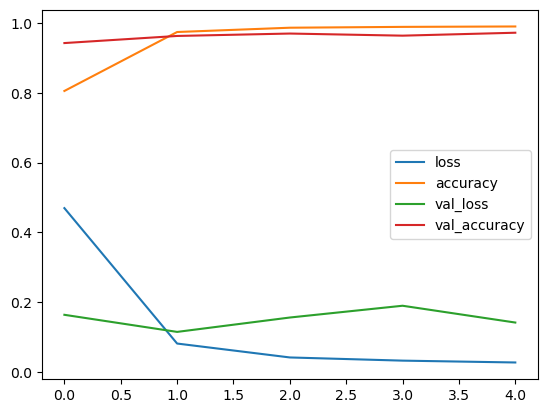

In [209]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [210]:
loss, acc = model_mult.evaluate(X_test_padded, y_test, verbose = 0)

In [211]:
print('Test accuracy %f' % (acc * 100))

Test accuracy 97.211581


In [213]:
from sklearn.metrics import classification_report

# Get the predictions for your test data
y_pred = model_mult.predict(X_test_padded)

# Convert the predicted probabilities into predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred_classes)

print(report)


1118/1118 [==============================] - 35s 30ms/step
              precision    recall  f1-score   support

           1       0.95      0.92      0.93      7165
           2       0.99      0.99      0.99      7255
           3       0.99      0.98      0.98      7073
           4       0.99      1.00      1.00      7074
           5       0.93      0.98      0.96      7188

    accuracy                           0.97     35755
   macro avg       0.97      0.97      0.97     35755
weighted avg       0.97      0.97      0.97     35755



In [214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
import scipy.stats
from sklearn.metrics import accuracy_score

confidence = 0.95  # Change to your desired confidence level
z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
print(z_value)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

1.959963984540054


In [215]:
from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((acc * (1 - acc)) / y.shape[0])
ci_lower = acc - ci_length
ci_upper = acc + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  0.9713526246667982 Upper bound:  0.9728790047048449

So, the above values represent the 95% confidence interval around the test set accuracy


Recall (also known as sensitivity) measures the percentage of true positives that were correctly identified by the model. A high recall indicates that the model is good at identifying all positive samples for a given class.

Precision measures the percentage of true positives out of all samples that were predicted as positive by the model. A high precision indicates that the model is good at not misclassifying negative samples as positive for a given class.

The F1-score is the harmonic mean of precision and recall, and it balances the trade-off between precision and recall. It is a good overall measure of a model's performance.

In your case, the model appears to have good performance for all classes, with high precision, recall, and F1-score values. The macro-average and weighted-average F1-score are both 0.97, indicating that the model has good overall performance.

## MULT BILSTM

In [216]:
model = Sequential()
#Create an embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
#Create a LSTM layer
model.add(Bidirectional(LSTM(32, activation = 'tanh')))
#Features extractors fully-connected layers
model.add(Dense(128, activation ='relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
#Final layer
model.add(Dense(6, activation = 'softmax'))

In [217]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          5720832   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 6)                 774       
                                                      

In [219]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [220]:
history = model.fit(X_train_padded, y_train, validation_data=(X_val_padded, y_val), epochs=5, batch_size=32)

Epoch 1/5
3576/3576 [==============================] - 4148s 1s/step - loss: 0.3201 - accuracy: 0.8690 - val_loss: 0.1048 - val_accuracy: 0.9612
Epoch 2/5
3576/3576 [==============================] - 3921s 1s/step - loss: 0.0553 - accuracy: 0.9822 - val_loss: 0.0908 - val_accuracy: 0.9716
Epoch 3/5
3576/3576 [==============================] - 3617s 1s/step - loss: 0.0218 - accuracy: 0.9935 - val_loss: 0.0642 - val_accuracy: 0.9844
Epoch 4/5
3576/3576 [==============================] - 2809s 786ms/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 0.0720 - val_accuracy: 0.9850
Epoch 5/5
3576/3576 [==============================] - 2886s 807ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.0740 - val_accuracy: 0.9802


<Figure size 800x500 with 0 Axes>

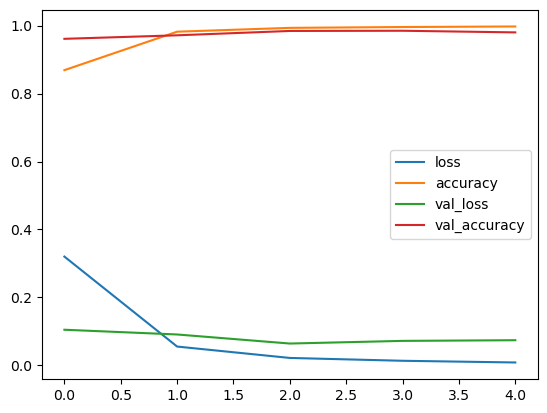

In [221]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [222]:
loss, acc = model.evaluate(X_test_padded, y_test, verbose = 0)

In [223]:
print('Test accuracy %f' % (acc * 100))

Test accuracy 98.128933


In [224]:
from sklearn.metrics import classification_report

# Get the predictions for your test data
y_pred = model.predict(X_test_padded)

# Convert the predicted probabilities into predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred_classes)

print(report)

1118/1118 [==============================] - 171s 153ms/step
              precision    recall  f1-score   support

           1       0.99      0.92      0.95      7165
           2       0.99      1.00      1.00      7255
           3       1.00      1.00      1.00      7073
           4       1.00      1.00      1.00      7074
           5       0.93      0.99      0.96      7188

    accuracy                           0.98     35755
   macro avg       0.98      0.98      0.98     35755
weighted avg       0.98      0.98      0.98     35755



## Mult CNN cross-validation

In [225]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import KFold
import numpy as np

# assume X_train, y_train, X_test, y_test are already defined


model_mult = Sequential()
model_mult.add(Embedding(dict_size, 100, input_length=max_comment_length))
model_mult.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model_mult.add(MaxPooling1D(pool_size=2))
model_mult.add(Flatten())
model_mult.add(Dense(10, activation='relu'))
model_mult.add(Dense(6, activation='softmax'))
print(model_mult.summary())

# define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# prepare the data
X = np.concatenate((X_train_padded, X_test_padded), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# evaluate the model using k-fold cross-validation
fold_scores = []
for train_idx, test_idx in kfold.split(X, y):
    # get the training and test data for this fold
    X_train_fold, y_train_fold = X[train_idx], y[train_idx]
    X_test_fold, y_test_fold = X[test_idx], y[test_idx]
    
    # compile the model
    model_mult.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # train the model
    model_mult.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, verbose=0)
    
    # evaluate the model on the test data for this fold
    scores = model_mult.evaluate(X_test_fold, y_test_fold, verbose=0)
    print(f'Fold loss: {scores[0]}, accuracy: {scores[1]}')
    fold_scores.append(scores[1])

# report the mean and standard deviation of the accuracy scores across all folds
print(f'Mean accuracy: {np.mean(fold_scores)}, std: {np.std(fold_scores)}')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1500, 100)         6504000   
                                                                 
 conv1d_5 (Conv1D)           (None, 1493, 32)          25632     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 746, 32)          0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 23872)             0         
                                                                 
 dense_14 (Dense)            (None, 10)                238730    
                                                                 
 dense_15 (Dense)            (None, 6)                 66        
                                                      

## Mult LSTM cross-validation


In [226]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import KFold
import numpy as np

# assume X_train, y_train, X_test, y_test are already defined


model = Sequential()
#Create an embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
#Create a LSTM layer
model.add(Bidirectional(LSTM(32, activation = 'tanh')))
#Features extractors fully-connected layers
model.add(Dense(128, activation ='relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
#Final layer
model.add(Dense(6, activation = 'softmax'))

# define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# prepare the data
X = np.concatenate((X_train_padded, X_test_padded), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# evaluate the model using k-fold cross-validation
fold_scores = []
for train_idx, test_idx in kfold.split(X, y):
    # get the training and test data for this fold
    X_train_fold, y_train_fold = X[train_idx], y[train_idx]
    X_test_fold, y_test_fold = X[test_idx], y[test_idx]
    
    # compile the model
    model_mult.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # train the model
    model_mult.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, verbose=0)
    
    # evaluate the model on the test data for this fold
    scores = model_mult.evaluate(X_test_fold, y_test_fold, verbose=0)
    print(f'Fold loss: {scores[0]}, accuracy: {scores[1]}')
    fold_scores.append(scores[1])

# report the mean and standard deviation of the accuracy scores across all folds
print(f'Mean accuracy: {np.mean(fold_scores)}, std: {np.std(fold_scores)}')

Fold loss: 0.019881151616573334, accuracy: 0.9907441139221191
Fold loss: 0.020820867270231247, accuracy: 0.9915761947631836
Fold loss: 0.020676055923104286, accuracy: 0.9904441833496094
Fold loss: 0.020616205409169197, accuracy: 0.9915096163749695
Fold loss: 0.018584923818707466, accuracy: 0.992108941078186
Mean accuracy: 0.9912766098976136, std: 0.0006022132888041443


## LSTM CROSS VALIDATION

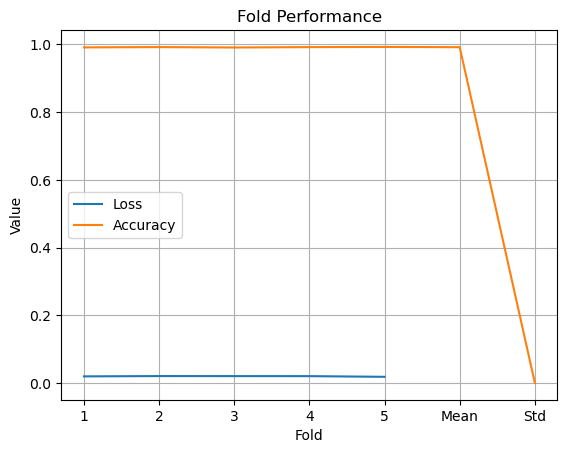

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
fold = [1, 2, 3, 4, 5, 'Mean', 'Std']
loss = [0.0199, 0.0208, 0.0207, 0.0206, 0.0186, None, None]
accuracy = [0.9907, 0.9916, 0.9904, 0.9915, 0.9921, 0.9913, 0.0006]

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(fold, loss, label='Loss')
ax.plot(fold, accuracy, label='Accuracy')

# Set the axis labels and title
ax.set_xlabel('Fold')
ax.set_ylabel('Value')
ax.set_title('Fold Performance')

# Add a legend and grid
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

## CNN CROSS VALIDATION

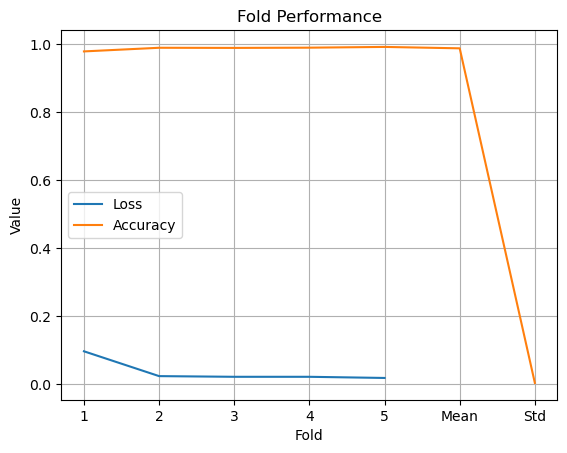

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
fold = [1, 2, 3, 4, 5, 'Mean', 'Std']
loss = [0.097, 0.024, 0.022, 0.022, 0.0186, None, None]
accuracy = [0.9788, 0.9895, 0.9891, 0.9898, 0.9920, 0.98788, 0.004]

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(fold, loss, label='Loss')
ax.plot(fold, accuracy, label='Accuracy')

# Set the axis labels and title
ax.set_xlabel('Fold')
ax.set_ylabel('Value')
ax.set_title('Fold Performance')

# Add a legend and grid
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

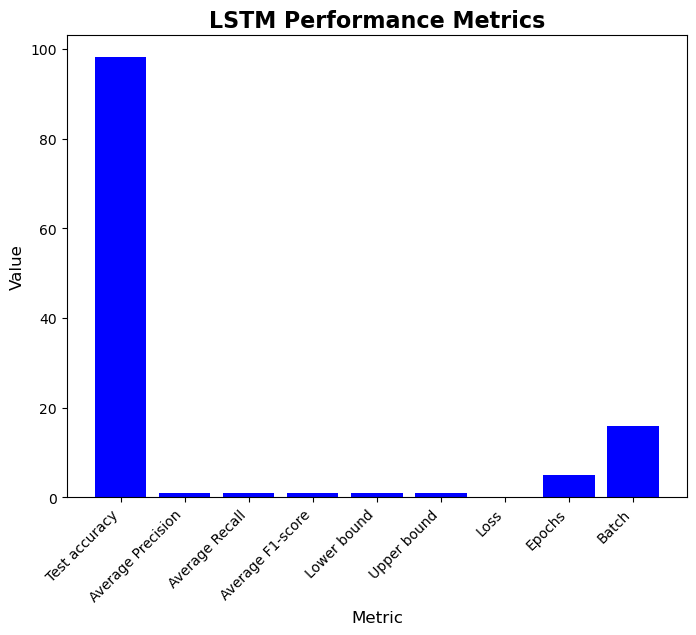

In [2]:
import matplotlib.pyplot as plt

# Data
lstm_data = {'Test accuracy': 98.128933, 'Average Precision': 0.982, 'Average Recall': 0.981, 
             'Average F1-score': 0.982, 'Lower bound': 0.9812, 'Upper bound': 0.9944, 'Loss': 0.0084,
             'Epochs': 5, 'Batch': 16}

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(lstm_data.keys(), lstm_data.values(), color='blue')

# Title and labels
ax.set_title('LSTM Performance Metrics', fontsize=16, fontweight='bold')
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Value', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

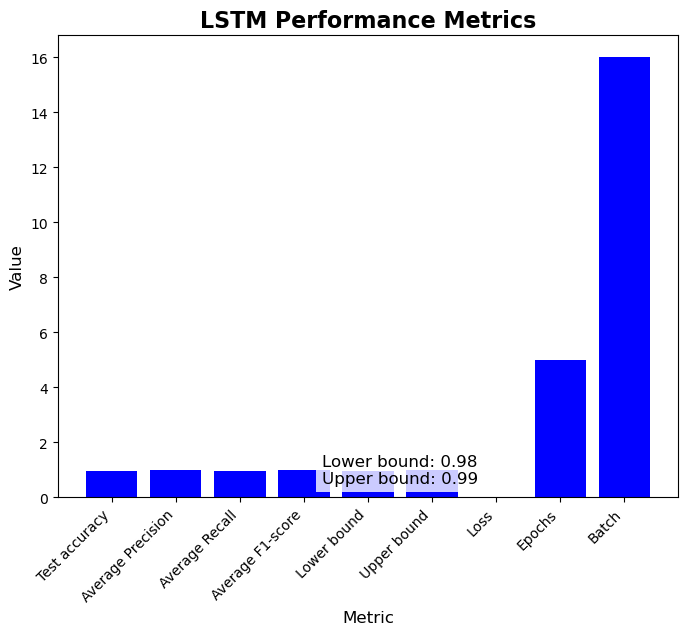

In [3]:
import matplotlib.pyplot as plt

# Data
lstm_data = {'Test accuracy': 0.98128933, 'Average Precision': 0.982, 'Average Recall': 0.981, 
             'Average F1-score': 0.982, 'Lower bound': 0.9812, 'Upper bound': 0.9944, 'Loss': 0.0084,
             'Epochs': 5, 'Batch': 16}

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(lstm_data.keys(), lstm_data.values(), color='blue')

# Title and labels
ax.set_title('LSTM Performance Metrics', fontsize=16, fontweight='bold')
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Value', fontsize=12)

# Format the confidence interval value to show two decimal places
confidence_interval = 'Lower bound: {:.2f}\nUpper bound: {:.2f}'.format(lstm_data['Lower bound'], lstm_data['Upper bound'])
ax.text(4.5, 0.992, confidence_interval, fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()